In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# import seaborn as sns
# import json
# from keras.datasets import cifar10
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from keras.callbacks import ModelCheckpoint

In [1]:

from tensorflow import keras
from keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint
from keras.layers import *
from keras.models import Model, load_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import json
from keras.datasets import cifar10
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### **Carga de datos**

### **Preprocesamiento de datos**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255, x_test / 255

### **Exploración de datos**

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
# for i in range(10):
#     plt.imshow([x_train[i],y_train[i]])

In [6]:
y_train[1][0]

9

In [7]:
np.array(y_train[0])

array([6], dtype=uint8)

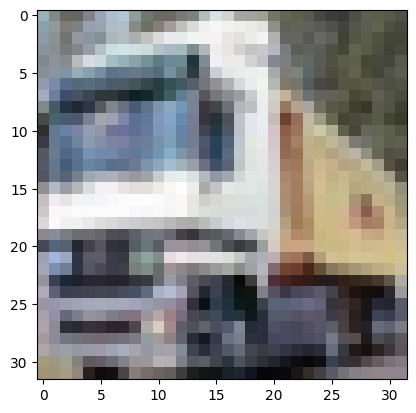

In [8]:
plt.imshow(x_train[1])

### **Construcción y entrenamiento del modelo**

##### Diseño de la red neuronal

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu' , input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

##### Compilación del modelo

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

##### Checkpointer

In [14]:
checkpointer = ModelCheckpoint(filepath = "cifar10_weights.hdf5", verbose = 1, save_best_only = True)

##### Entrenamiento del modelo

In [15]:
history = model.fit(x_train, y_train, batch_size = 16, epochs = 2, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/2


2967/2969 [============================>.] - ETA: 0s - loss: 1.4168 - accuracy: 0.4919
Epoch 1: val_loss improved from inf to 1.12722, saving model to cifar10_weights.hdf5
2969/2969 [==============================] - 28s 9ms/step - loss: 1.4168 - accuracy: 0.4918 - val_loss: 1.1272 - val_accuracy: 0.6108
Epoch 2/2
   7/2969 [..............................] - ETA: 30s - loss: 1.2010 - accuracy: 0.5982

C:\Users\Adri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2969/2969 [==============================] - ETA: 0s - loss: 1.0571 - accuracy: 0.6274
Epoch 2: val_loss improved from 1.12722 to 0.97343, saving model to cifar10_weights.hdf5
2969/2969 [==============================] - 25s 8ms/step - loss: 1.0571 - accuracy: 0.6274 - val_loss: 0.9734 - val_accuracy: 0.6628


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### **Evaluación del modelo**

##### Evaluación del rendimiento

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9894 - accuracy: 0.6582


In [18]:
print("Precisión del modelo:", test_accuracy)
print("Pérdida del modelo:", test_loss)

Precisión del modelo: 0.6582000255584717
Pérdida del modelo: 0.989445686340332


In [19]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [20]:
# f1_score(y_test, y_pred, average='weighted')

##### Gráficas de evaluación

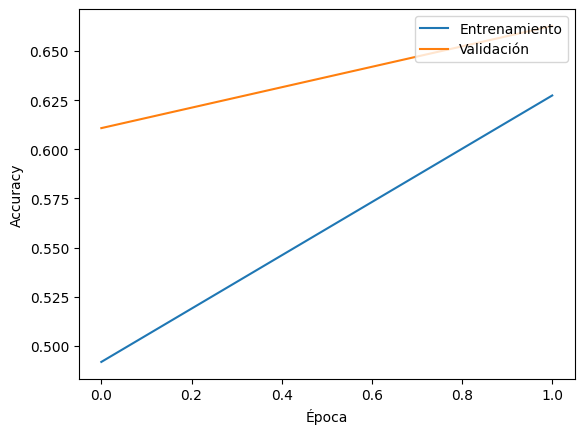

In [21]:
def plot_history():
    plt.plot(history.history['accuracy'], label="Entrenamiento")
    plt.plot(history.history['val_accuracy'], label="Validación")
    plt.ylabel('Accuracy')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()

##### Matriz de confusión

In [22]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

313/313 [==============================] - 1s 5ms/step


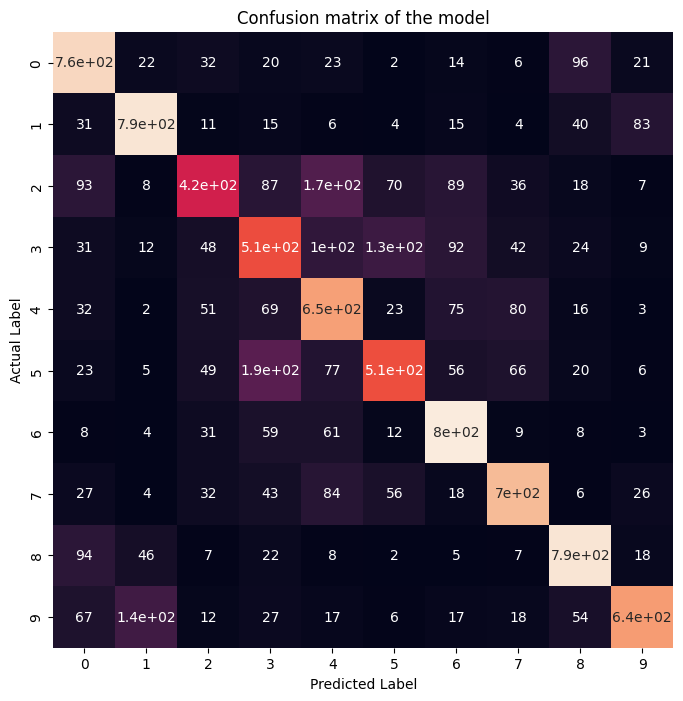

In [29]:
cm = confusion_matrix(y_true = y_test, y_pred = predicted_classes)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot=True, cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel('Actual Label')
plt.title('Confusion matrix of the model')
plt.show()

In [24]:
# Convert the history.history dict to a JSON file
with open('model_history.json', 'w') as f:
    json.dump(history.history, f)

Tras realizar la evaluación del modelo y como reflexión final se ha comprobado que la precisión es bastante baja y la pérdida es bastante alta lo que indica que no es un modelo efectivo y no da buenos resultados. 
Una manera de mejorar el modelo podría ser agregar más epochs y normalizar mejor los datos.

## Mostrar 64 imágenes con lo que ha predicho y lo que era